*Collaborators: Kevin, Amalia, Maya, Nicole, Numa*

In [1]:
%matplotlib notebook
import numpy as np
import scipy as sc
from scipy.special import iv
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.ion()

# Problem 1.1

<IPython.core.display.Javascript object>


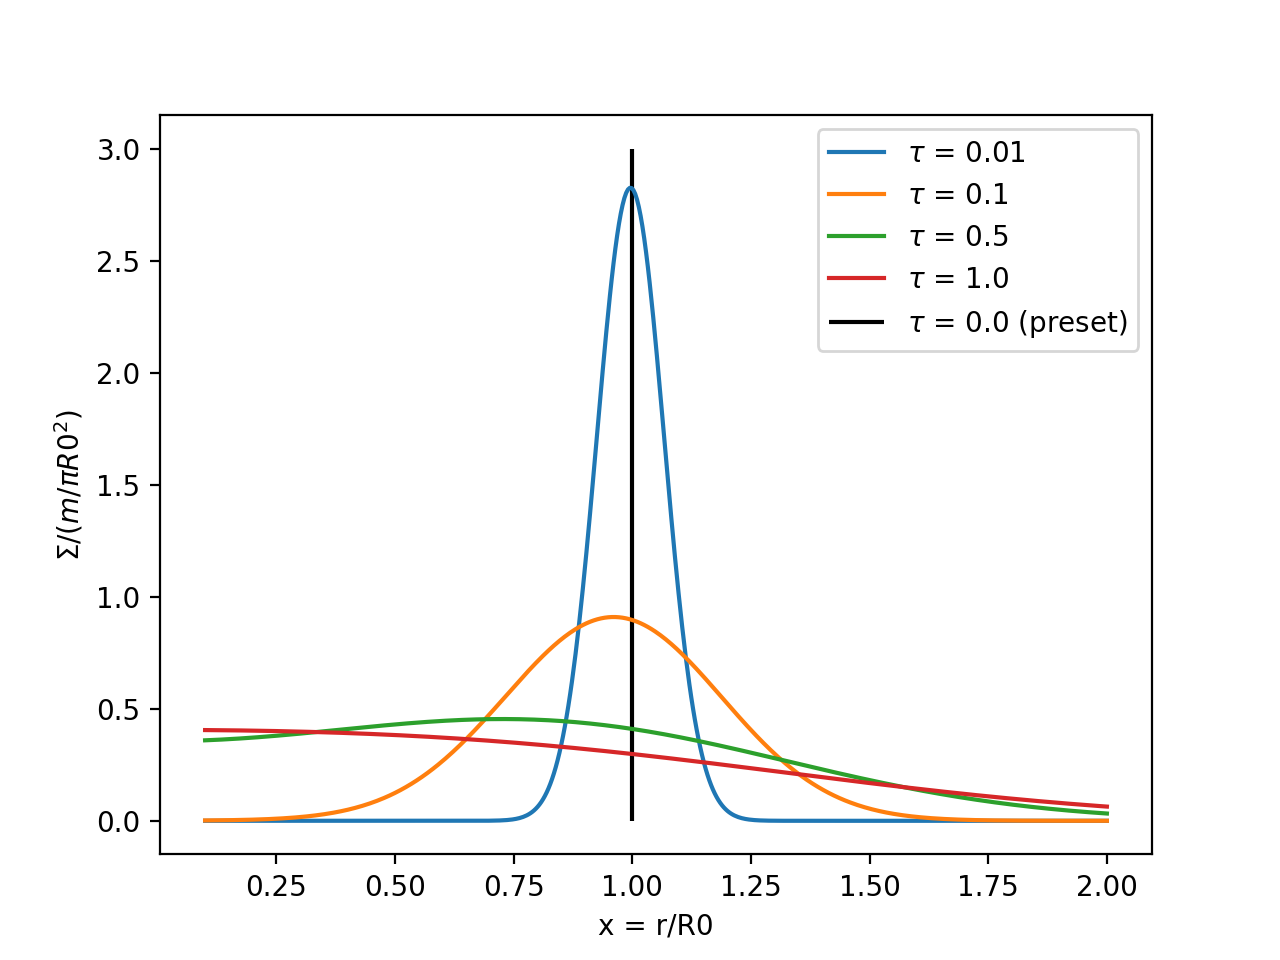

In [2]:
R0 = 1.
xs = np.linspace(0.1, 2.,500)
taus = [0.,0.01,0.1,0.5,1.]

fig = plt.figure()

for tau in taus:
    if tau == 0.:
        plt.vlines(1,ymin=0,ymax=3.,color='k',label=rf"$\tau$ = {tau} (preset)")
    else:
        f = (1/(tau*xs**(1/4)))*np.exp(-(1+xs**2)/tau)*iv(1/4, 2*xs/tau)
        plt.plot(xs,f,label=rf"$\tau$ = {tau}")
plt.xlabel("x = r/R0")
plt.ylabel(r"$\Sigma/(m/\pi R0^{2})$")
plt.legend()
plt.show()

# Problem 1.3

In [10]:
#grid size
Ngrid= 200
#grid cell size
dr = 0.1
#grid cells
r = np.arange(0.1,Ngrid) * dr
#viscosity coefficient for advection
nu=0.5
#diffusion coefficient, derived expression
D = 3*nu
#velocity distribution: should be temporally constant, derived expression
v=-(9*nu)/(2*r)
#outflow boundary condition for velocity
v[0]=-np.abs(v[1])
v[-1]=-np.abs(v[-2])

#get dt to be = minimum dr/u to satisfy Courant condition
dt = np.min(dr/np.abs(v))
print(dt,np.min(dr/np.abs(v)))

# initial density distribution is Gaussian, centered at grid midpoint
f = 1.*np.exp(-(r-(Ngrid*dr/2))**2./(1**2))
#print(f)

#advection alpha
alpha = (0.5)*v*dt/dr

# beta for diffusion, as defined in Numerical Methods notes
beta = D*dt/(dr**2)

#double checking the initial distribution looks correct
#fig = plt.figure()
#plt.scatter(r,f)

0.00488888888888889 0.00488888888888889


<IPython.core.display.Javascript object>


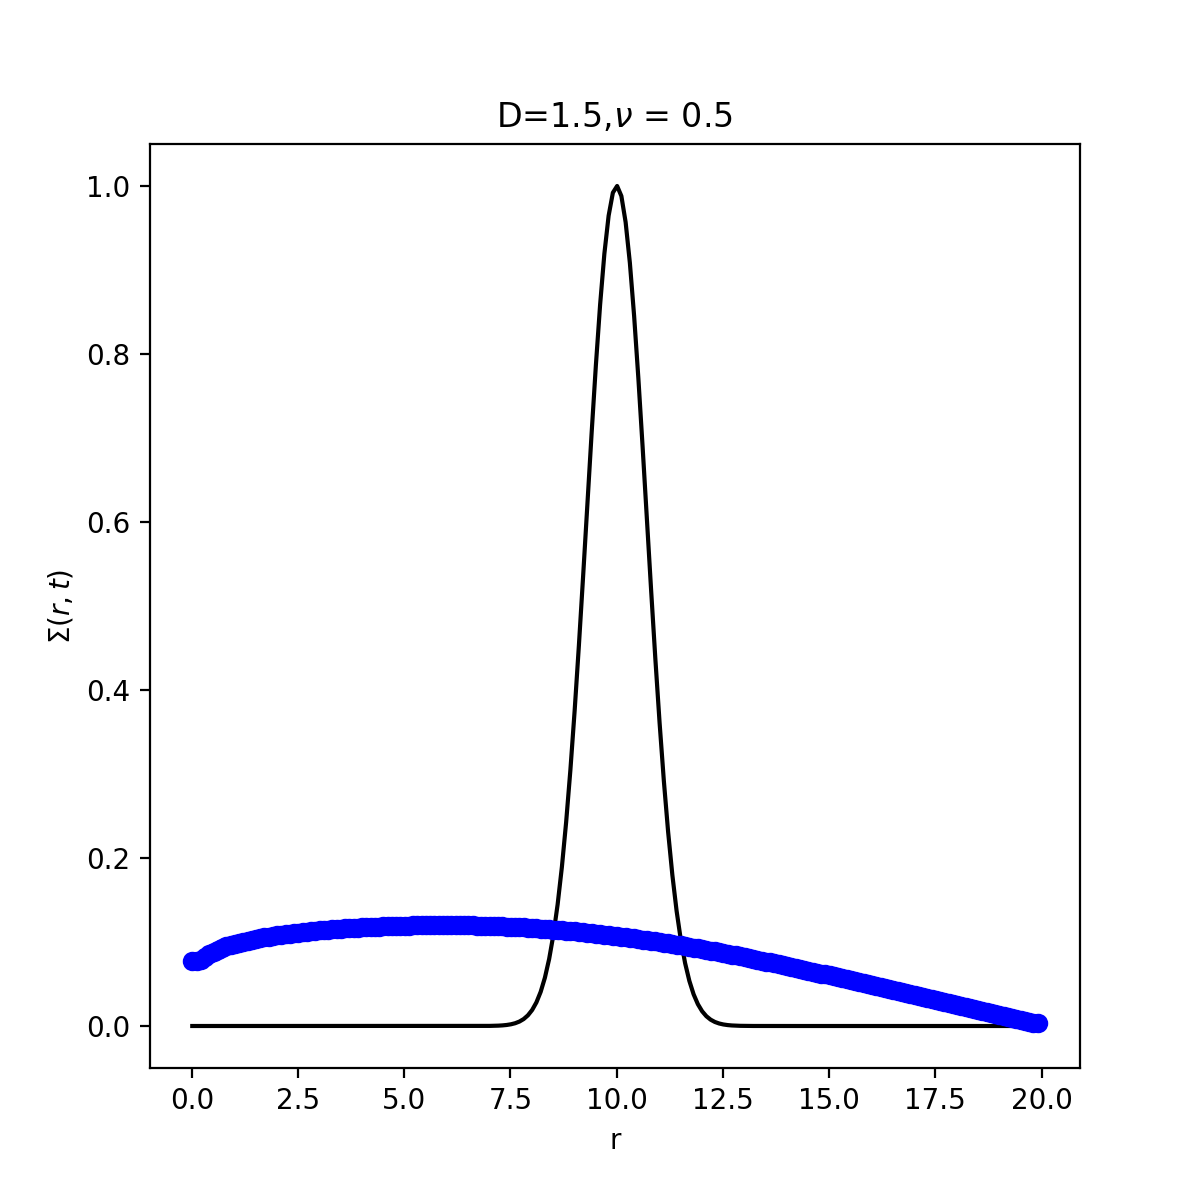

In [11]:
# set plot titles and labels
fig = plt.figure(figsize=(6,6))
plt.title(fr'D={D},$\nu$ = {nu}')
plt.xlabel('r')
plt.ylabel(r'$\Sigma(r,t)$')

plt.plot(r, f, 'k-') #plot starting point for reference

plt0, = plt.plot(r, f, 'bo') #initialize the plot that will update over time

fig.canvas.draw()

#iteration steps
Nsteps = 2000

#looping through the steps
for n in np.arange(Nsteps):
    # matrix to apply diffusion step: taken from Numerical Methods notes (Implicit Method)
    A = np.eye(Ngrid)*(1.+2.*beta)+np.eye(Ngrid, k=1)*-beta+np.eye(Ngrid, k=-1)*-beta
    # solve matrix equation
    f = np.linalg.solve(A, f)

    # advection step via Lax-Friedrichs
    f[1:Ngrid-1] = 0.5*(f[2:]+f[:Ngrid-2])-alpha[1:Ngrid-1]*(f[2:]-f[:Ngrid-2])

    # outflow boundary conditions
    f[0]=f[1]
    f[-1]=f[-2]
    
    plt0.set_ydata(f)
    fig.canvas.draw()
    plt.pause(0.001)